In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_squared_error,mean_absolute_error
import warnings

In [ ]:
plt.style.use('ggplot')
plt.style.use('fivethirtyeight')

In [ ]:
def mean_absolute_percentage_error(y_true,y_pred):
    y_true,y_pred=np.array(y_true),np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [ ]:
d=pd.read_csv('Sample - Superstore.csv',encoding='cp1252')

In [ ]:
df=d.head(100)

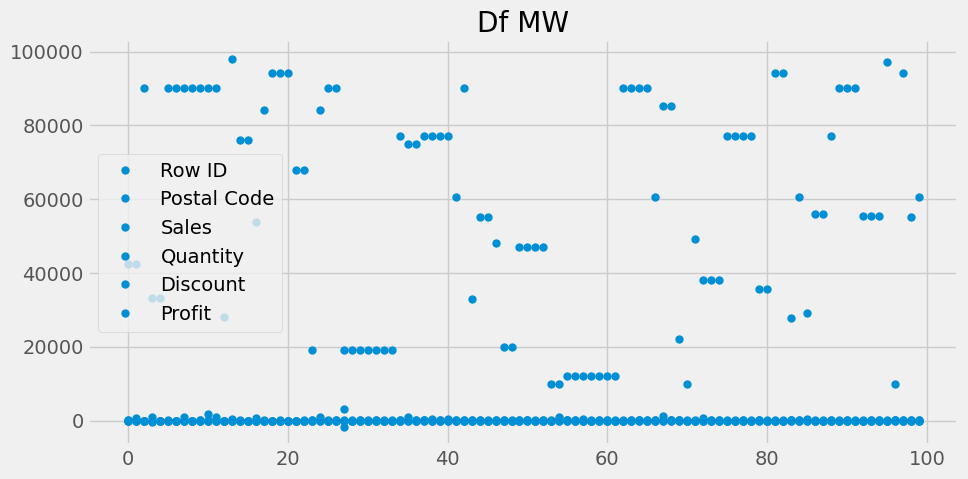

In [ ]:
color_pal=sns.color_palette()
df.plot(style='.',figsize=(10,5),ms=10,color=color_pal[0],title='Df MW')
plt.show()

In [ ]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,US-2017-109484,11/6/2017,11/12/2017,Standard Class,RB-19705,Roger Barcio,Home Office,United States,Portland,...,97206,West,OFF-BI-10004738,Office Supplies,Binders,Flexible Leather- Look Classic Collection Ring...,5.6820,1,0.70,-3.7880
96,97,CA-2017-161018,11/9/2017,11/11/2017,Second Class,PN-18775,Parhena Norris,Home Office,United States,New York City,...,10009,East,FUR-FU-10000629,Furniture,Furnishings,9-3/4 Diameter Round Wall Clock,96.5300,7,0.00,40.5426
97,98,CA-2017-157833,6/17/2017,6/20/2017,First Class,KD-16345,Katherine Ducich,Consumer,United States,San Francisco,...,94122,West,OFF-BI-10001721,Office Supplies,Binders,Trimflex Flexible Post Binders,51.3120,3,0.20,17.9592
98,99,CA-2016-149223,9/6/2016,9/11/2016,Standard Class,ER-13855,Elpida Rittenbach,Corporate,United States,Saint Paul,...,55106,Central,OFF-AP-10000358,Office Supplies,Appliances,Fellowes Basic Home/Office Series Surge Protec...,77.8800,6,0.00,22.5852


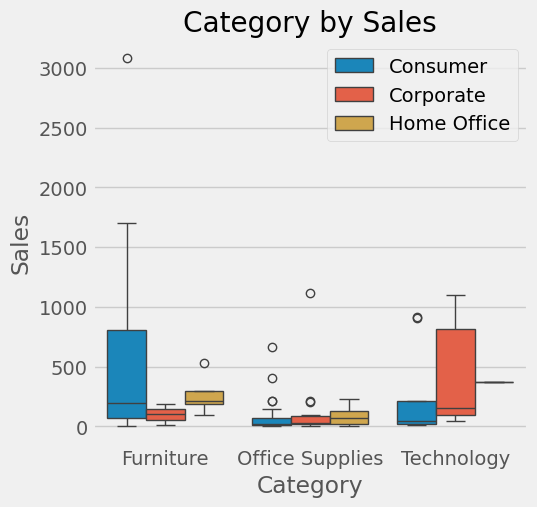

In [ ]:
fig,ax=plt.subplots(figsize=(5,5))
sns.boxplot(data=df.dropna(),
            x='Category',
            y='Sales',
            hue='Segment',
            ax=ax,
            linewidth=1)
ax.set_title('Category by Sales')
ax.set_xlabel('Category')
ax.set_ylabel('Sales')
ax.legend(bbox_to_anchor=(1,1))
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
num_features = ['Sales', 'Quantity', 'Discount']
cat_features = ['Segment', 'Region', 'Category', 'Ship Mode']

X_num = df[num_features]
X_cat = pd.get_dummies(df[cat_features], drop_first=True)

X = pd.concat([X_num, X_cat], axis=1)
y = df['Profit']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


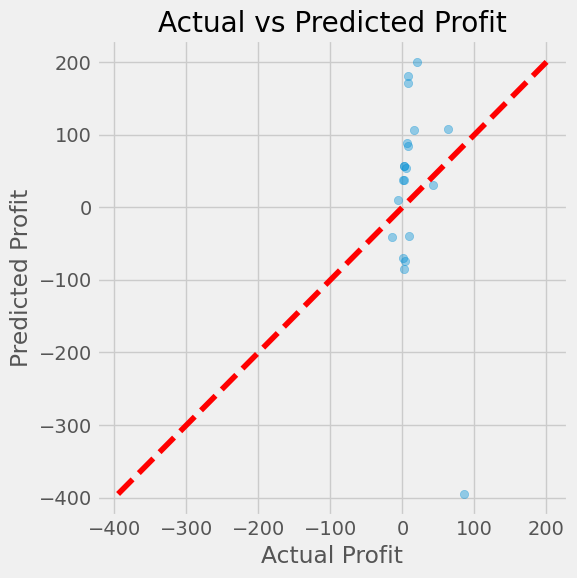

In [ ]:
y_pred = model.predict(X_test)

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.4)
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.title('Actual vs Predicted Profit')

lims = [min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())]
plt.plot(lims, lims, 'r--')
plt.tight_layout()
plt.show()


In [ ]:
df = df.copy()   # right after you create the filtered df
df['Order Date'] = pd.to_datetime(df['Order Date'])
daily_sales = df.groupby('Order Date')['Sales'].sum().reset_index()
daily_sales = daily_sales.rename(columns={'Order Date': 'ds', 'Sales': 'y'})


14:39:18 - cmdstanpy - INFO - Chain [1] start processing
14:39:18 - cmdstanpy - INFO - Chain [1] done processing


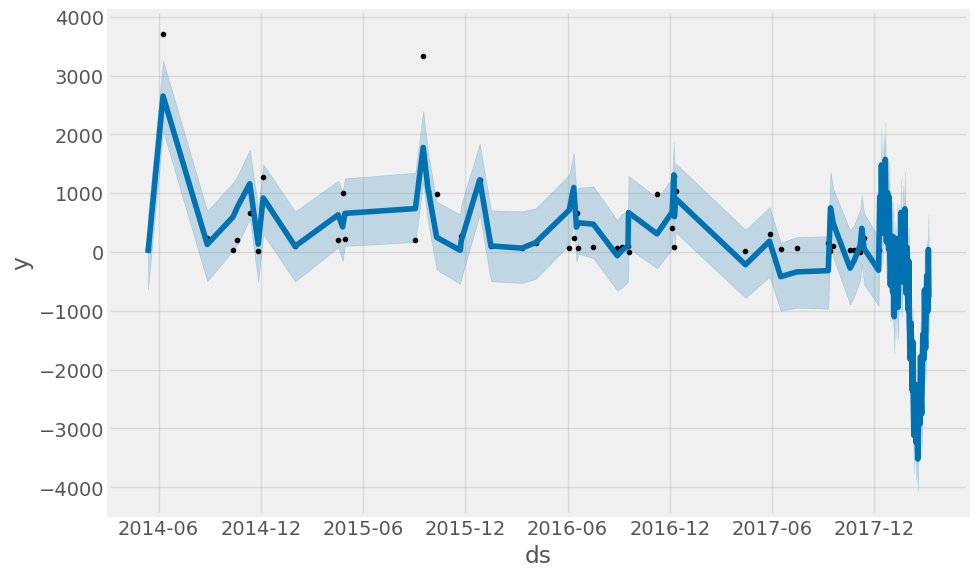

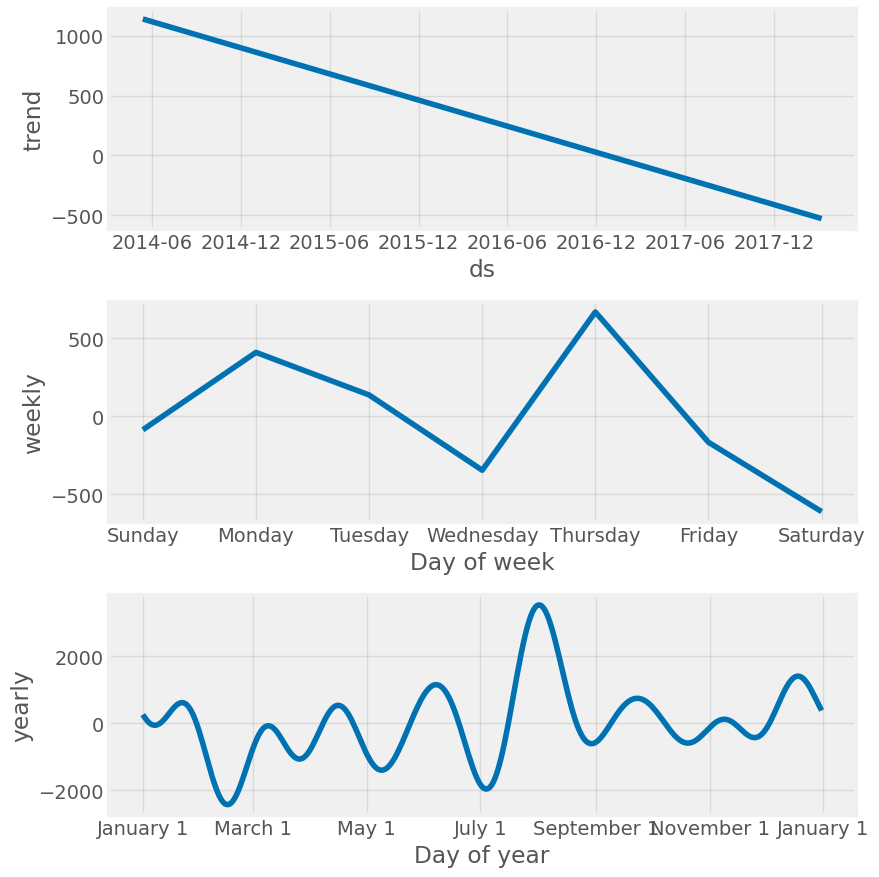

In [ ]:
# 1. Initialize and fit model
m = Prophet()
m.fit(daily_sales)

# 2. Create future dates (e.g., next 90 days)
future = m.make_future_dataframe(periods=90)  # 90 future days

# 3. Predict
forecast = m.predict(future)

# 4. Plot forecast
fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)  # trend + weekly/yearly seasonality


In [ ]:
# Evaluate model with Error Metrics

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE  : {mae:.2f}")
print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.3f}")

MAE  : 92.82
MSE  : 18774.53
RMSE : 137.02
R²   : -33.930


In [ ]:
# Predict the future

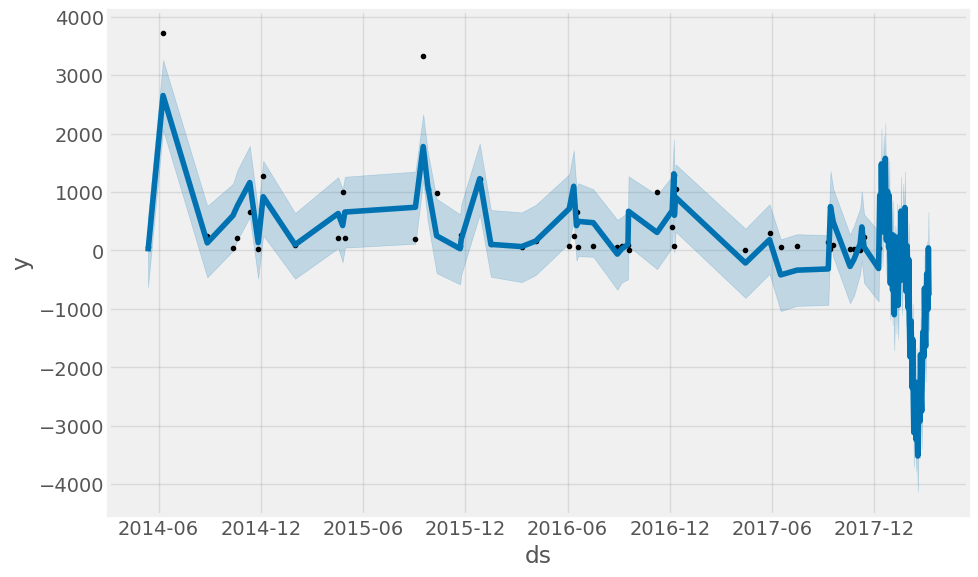

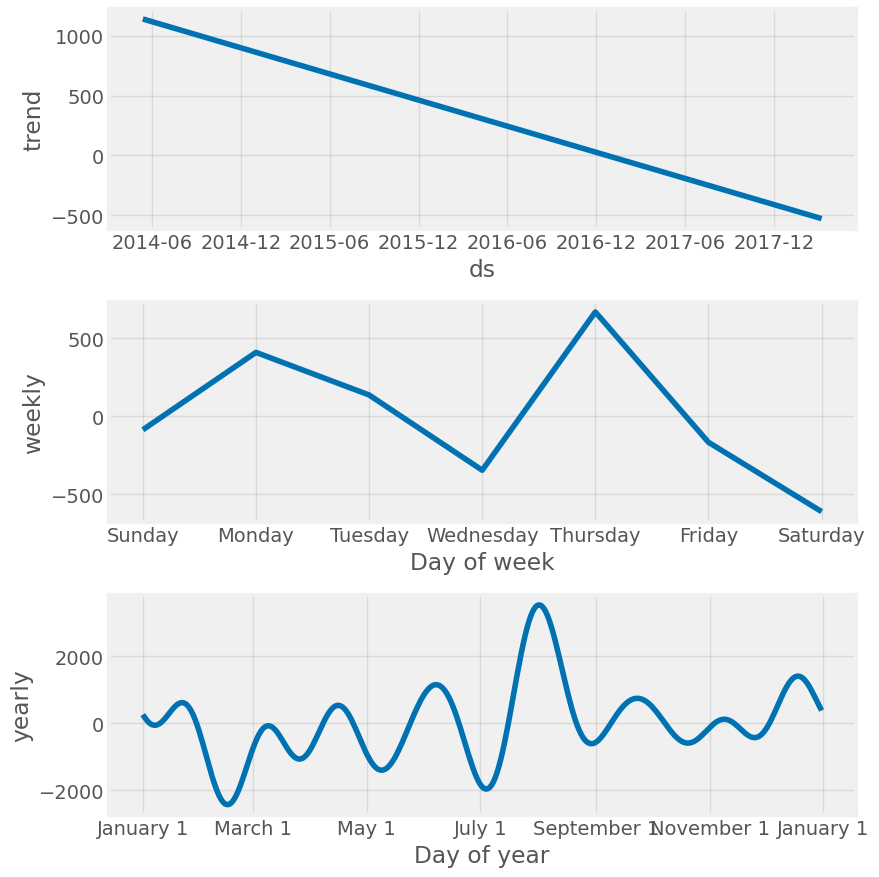

In [ ]:
future = m.make_future_dataframe(periods=90, freq='D')  # 90 future days
forecast = m.predict(future)
fig1 = m.plot(forecast)          # shows actual + forecast with uncertainty
fig2 = m.plot_components(forecast)